In [1]:
import fastf1
import fastf1.plotting
import fastf1.legacy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fastf1.plotting.setup_mpl()
fastf1.Cache.enable_cache("cache")

In [3]:
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
DRIVER = input('Piloto 1: ')
DRIVER_NUMBER = input('Piloto número: ')
LAP_N = int(input('Vuelta #: '))

Año: 2022
Round: 10
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
Piloto 1: PER
Piloto número: 11
Vuelta #: 50


core           INFO 	Loading data for British Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '11', '44', '16', '14', '4', '1', '47', '5', '20', '18', '6', '3', '22', '31', '10', '77', '63', '24', '23']


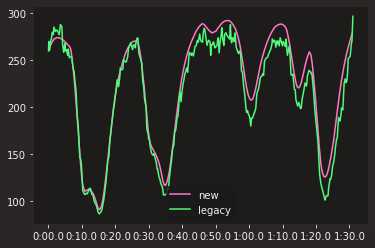

In [4]:
session = fastf1.get_session(year, wknd, ses)
session.load()

# DRIVER = 'VER'  # which driver; need to specify number and abbreviation
# DRIVER_NUMBER = '33'
# LAP_N = 10  # which lap number to plot

drv_laps = session.laps.pick_driver(DRIVER)
drv_lap = drv_laps[(drv_laps['LapNumber'] == LAP_N)]  # select the lap

# create a matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()

# ############### new
df_new = drv_lap.get_car_data().add_driver_ahead()
ax.plot(df_new['Time'], df_new['DistanceToDriverAhead'], label='new')

# ############### legacy
df_legacy = fastf1.legacy.inject_driver_ahead(session)[DRIVER_NUMBER].slice_by_lap(drv_lap)
ax.plot(df_legacy['Time'], df_legacy['DistanceToDriverAhead'], label='legacy')

plt.legend()
plt.show()